## Resolution of a problem of irrigation water estimation using the shooting method in dimension 2

For given $A\in\mathcal{M}_2(\mathbb{R})$, $G_2\in\mathcal{M}_2(\mathbb{R})$, $C\in\mathcal{M}_2(\mathbb{R})$, and $q_1,q_2>0$ considered ponderation weights, we want to construct the optimal pair
```math
\begin{aligned}
h^\star(t) &= -\tfrac{1}{q_2} G_2^\top p(t),\\
z(0) &= -\tfrac{1}{q_1} p(0)
\end{aligned}
```
where $(z,p)$ is solution of the optimality system  given by the TPBVP:
```math
\begin{aligned}
z'(t) &= A z(t) + G_2 h^\star(t) = A z(t) - \tfrac{1}{q_2} G_2 G_2^\top p(t), \quad z(0) = -\tfrac{1}{q_1} s,\\
p'(t) &= -A^\top p(t) - C^\top\!\big(C z(t) - y^{\mathrm m}(t)\big), \quad p(T)=0,
\end{aligned}
```
and $s := p(0)\in\mathbb{R}^2$ is **the shoot unknown**.  

---

### Implementation scheme (pseudo-code)
1. Give input data 
    - System: A, $G_2$, C
    - Objective: z0, h as known
    - Time discretization: T, N
    - Regulations: q1, q2
2. Forward z_true and y_m from known z0 and h
    - Integrate $z'(t) = A z(t) + G_2 h(t)$ using RK4 over grid t
    - Then compute $y(t) = C z(t)$
3. Backward p and $z_{est}$ from y_m with shooting method on p(0)
    - Define a function that integrate $(z'(t), p'(t))$ with $z(0) = -s/q1$, $p(T) = 0$ under the shoot $s=p(0)$.
    - Define the shooting function $F(s) := p(T; s)$ and find the good $s^\star$ such that $F(s^\star)=0$ by multiple integrations with $s$.
    - Integrate final (z, p) with the good $s^\star$.
4. Reconstruction of the irrigation $h_{est}$
    - $h(t) = -(1/q2) * G_2^T p(t)$
    - $z(0) = -(1/q1) * p(0)$
5. Make plots and metrics
    - Metrics: 
        - $Z0Error = z_0 - z_{0est}$
        - $RMSE_z = \sqrt{mean((z_{true} - z_{est})^2)}$
        - $RMSE_h = \sqrt{mean((z_{true} - z_{est})^2)}$
        - $Y Misfit = \int_0^T \|Cz(t)-y^m(t)\|^2 dt$
        - $H Energy = \int_0^T \|h(t)\|^2 dt$
    - Plots:
        - $z_{true}$ vs $z_{est}$
        - $h_{true}$ vs $h_{est}$
        - $z_{est}$ as function of q1 and/or q2
        - $h_{est}$ as function of q1 and/or q2
        - $RMSE_z$ as function of q1 and/or q2
        - $RMSE_h$ as function of q1 and/or q2
        - $Y Misfit$ as function of q1 and/or q2
        - $H Energy$ as function of q1 and/or q2

---

### Input example
- System: $A = \begin{bmatrix}2 & 0 \\[3pt] 0 & 4\end{bmatrix},\;G_2 = \begin{bmatrix}3 & 0 \\ 0 & 2.5\end{bmatrix}$ and $C = \begin{bmatrix}4.9 & 0 \\ 0 & 9\end{bmatrix}$
- Objective: $z_{0true} = \begin{bmatrix}4 \\ 5\end{bmatrix}$, $
h_{1\mathrm{true}}(t) = 0.5\,t(1-t), \;
h_{2\mathrm{true}}(t) = 1-(t-0.5)^2$
- Time discretization: $T=1, N=200$
- Regulation: $q_1=0.001, q_2=0.5$

---

### Ouput example (metrics)
z0 true = [4 5]', z0 estimated = [4.00225004 5.06704223]', error = 0.067<br>
RMSE(z) = 0.041<br>
RMSE(h) = 0.962<br>
Y Misfit = 0.233<br>
h Energy = 4.477

---

In [1]:
# Importations des modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Import steps 1-5 functions
from functions_n2 import *

In [3]:
# Step 1: Data input
# System parameters
n = 2
A  = np.array([
    [2.0, 0],
    [0, 4.0]])
G2 = np.diag([3.0, 2.5])
C  = np.array([
    [4.9, 0],
    [ 0, 9.0]])

# Objective
z0 = np.array([4.0, 5.0])           # supposed known
h1 = lambda t : 0.5 * t * (1 - t)   # supposed known
h2 = lambda t : 1 - (t - 0.5)**2    # supposed known

# Regulation parameters
q1 = 1
q2 = 1

# Time discretization
T = 1
N = 200
dt = T / N
t  = np.linspace(0, T, N+1)

In [4]:
# Simulation for q1 and q2 (step 1 to 4)
h_true, z_true, y_m, z0_est, z_est, h_est = simulate_n2(A, G2, C, z0, h1, h2, T, N, q1, q2)

In [5]:
# showing true vs estimated
df = pd.DataFrame({"t": t})
df[["h1_true", "h2_true"]] = h_true
df[["h1_est", "h2_est"]] = h_est
df[["z1_true", "z2_true"]] = z_true
df[["z1_est", "z2_est"]] = z_est
df[["y1", "y2"]] = y_m
display(df)

,t,h1_true,h2_true,h1_est,h2_est,z1_true,z2_true,z1_est,z2_est,y1,y2
0,0.000,0.000000,0.750000,7.837766e+00,10.339481,4.000000,5.000000,2.612589,4.135793,19.600000,45.000000
1,0.005,0.002488,0.754975,7.259712e+00,9.257682,4.040219,5.110507,2.756281,4.347752,19.797075,45.994566
2,0.010,0.004950,0.759900,6.724704e+00,8.300238,4.080880,5.223310,2.892739,4.550428,19.996313,47.009787
3,0.015,0.007387,0.764775,6.229548e+00,7.452941,4.121987,5.338453,3.022537,4.745190,20.197735,48.046073
4,0.020,0.009800,0.769600,5.771286e+00,6.703203,4.163543,5.455983,3.146206,4.933255,20.401361,49.103845
...,...,...,...,...,...,...,...,...,...,...,...
196,0.980,0.009800,0.769600,2.954934e-02,1.612966,29.117589,279.311962,29.099689,279.018721,142.676187,2513.807658
197,0.985,0.007388,0.764775,2.280702e-02,1.283799,29.410355,284.964124,29.391129,284.619257,144.110742,2564.677120
198,0.990,0.004950,0.759900,1.565454e-02,0.908945,29.706027,290.730407,29.685382,290.327690,145.559534,2616.573662
199,0.995,0.002488,0.754975,8.062661e-03,0.483015,30.004634,296.613114,29.982471,296.145605,147.022707,2669.518026


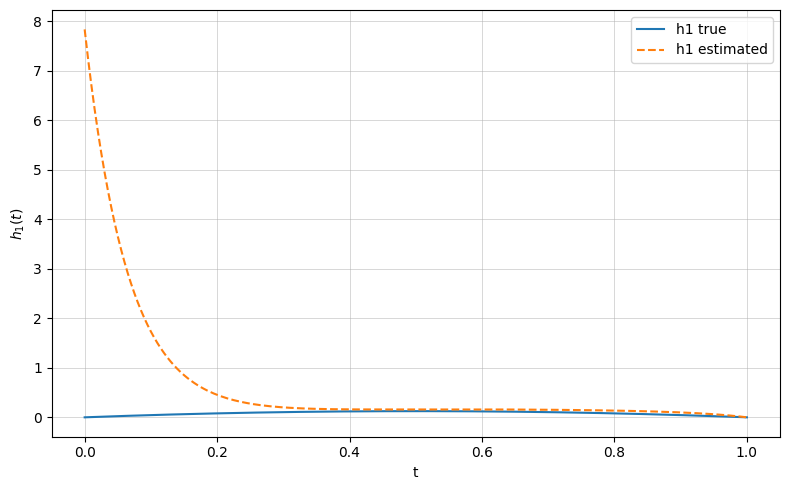

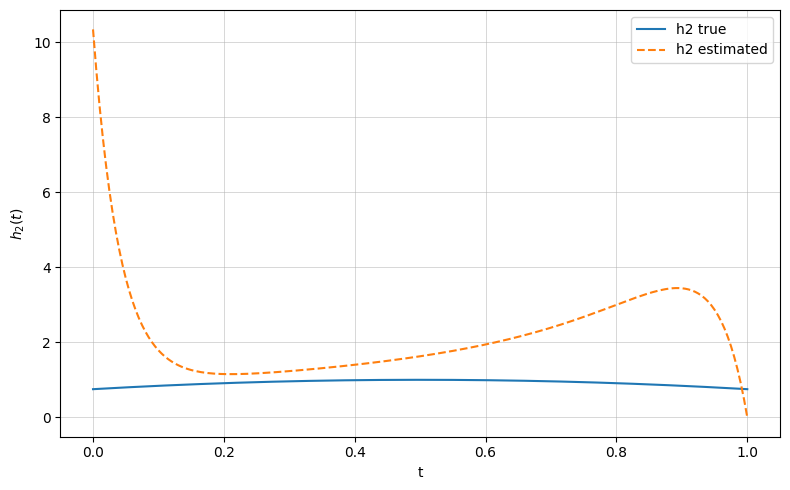

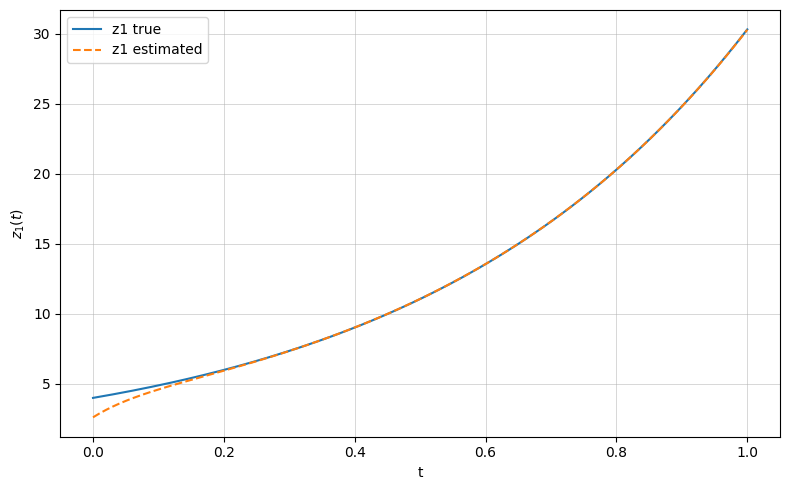

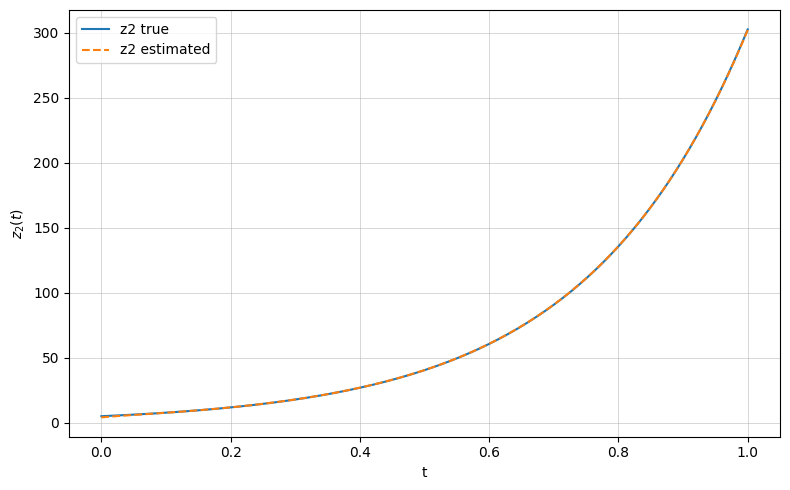

In [6]:
# Step 5: quick plots
make_plots(h_true, z_true, z_est, h_est, t, save=False, outdir = "figs")

In [7]:
# Step 5: metrics
z0_error, z0_energy, z_rmse, h_rmse, misfit, energy = compute_metrics(C, z0, h_true, z_true, y_m, z0_est, z_est, h_est, t)
print("===== Résultats =====")
print(f"z0 true = {z0}, z0 estimated = {z0_est}, error = {z0_error}")
print(f"RMSE(z) = {z_rmse:.3f}")
print(f"RMSE(h) = {h_rmse:.3f}")
print(f"Misfit = {misfit:.3f}")
print(f"Energy = {energy:.3f}")

===== Résultats =====
z0 true = [4. 5.], z0 estimated = [2.61258856 4.13579254], error = 1.6345534677167544
RMSE(z) = 0.213
RMSE(h) = 1.705
Misfit = 3.249
Energy = 8.619


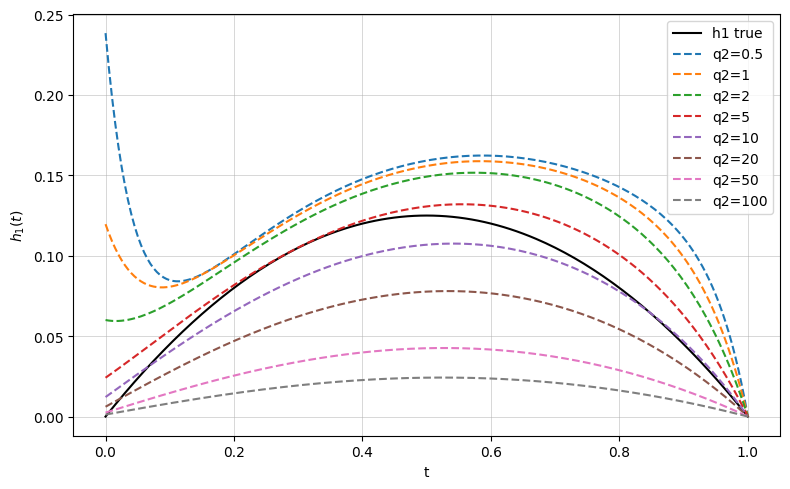

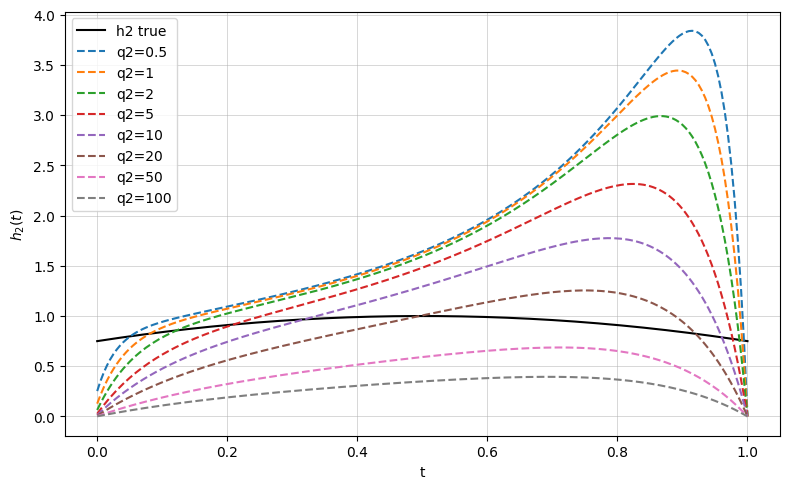

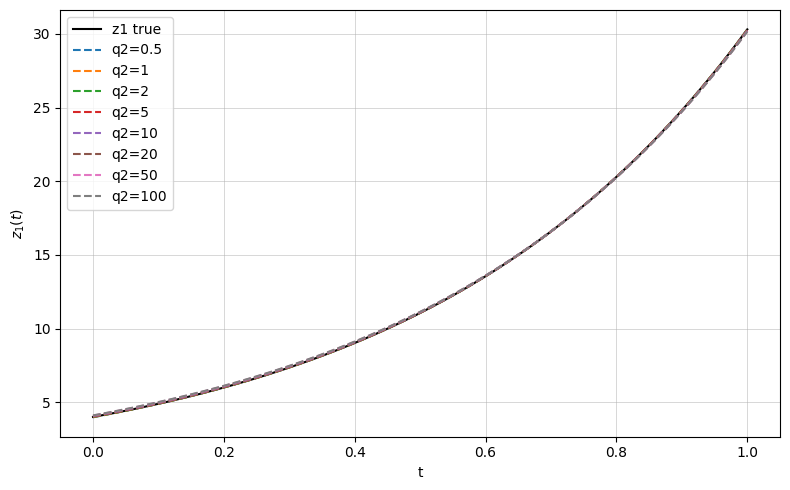

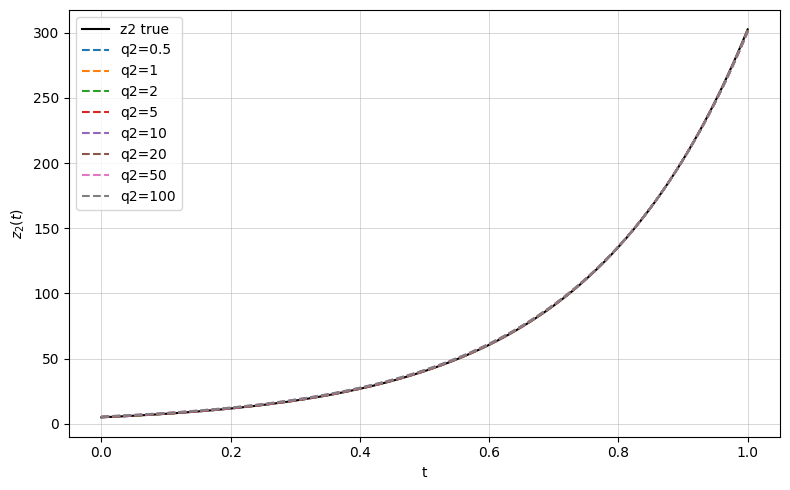

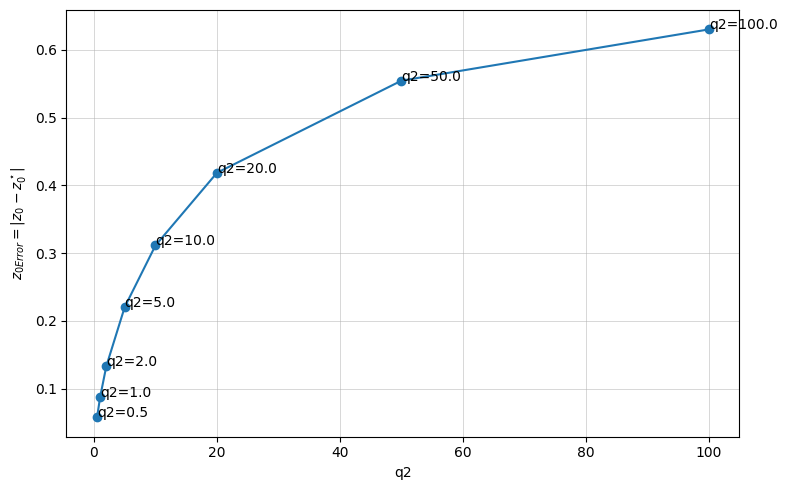

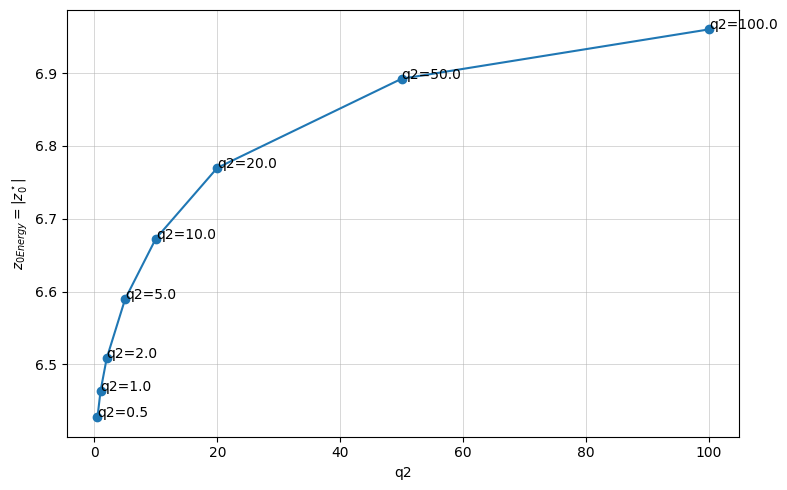

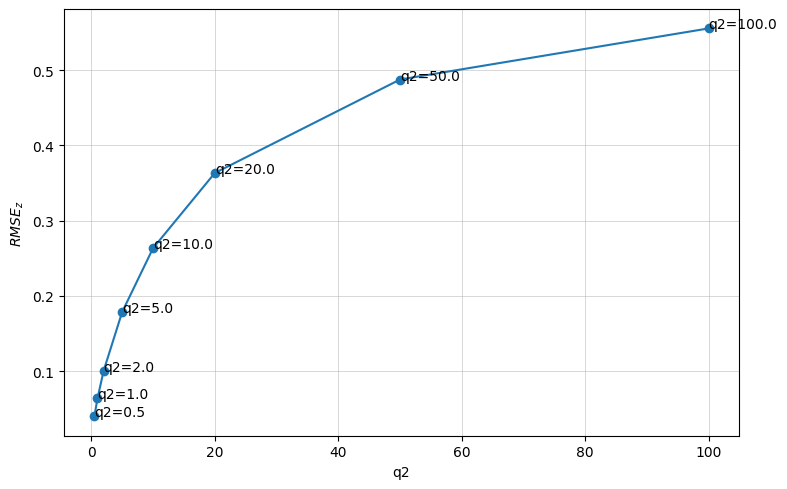

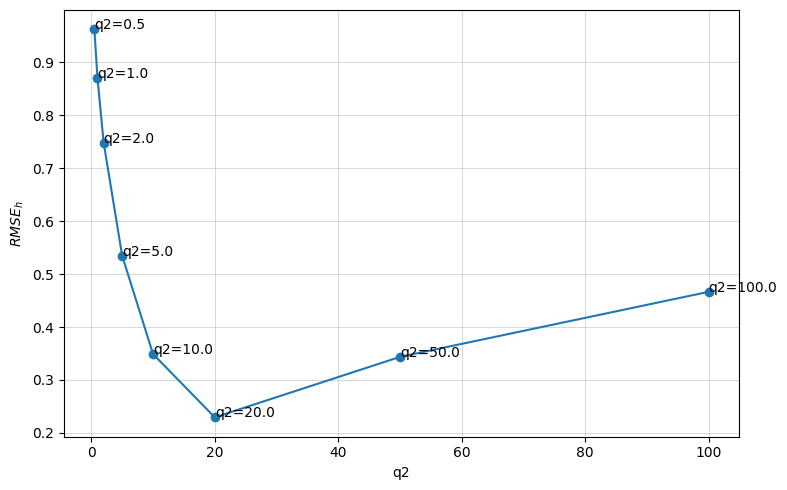

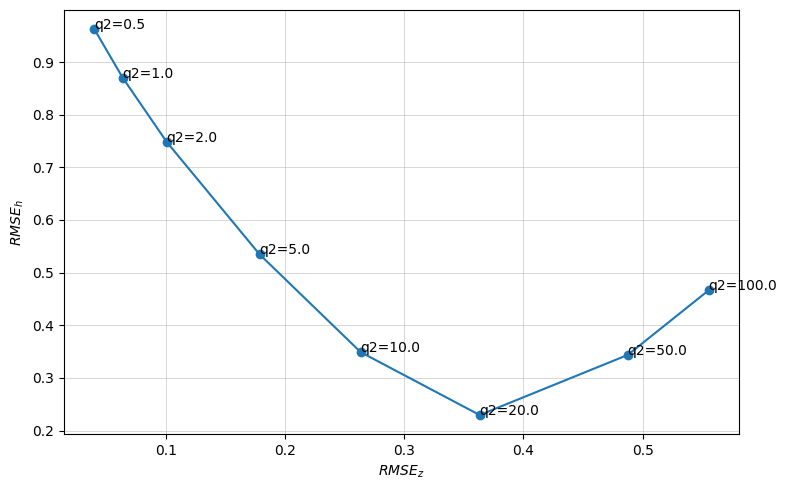

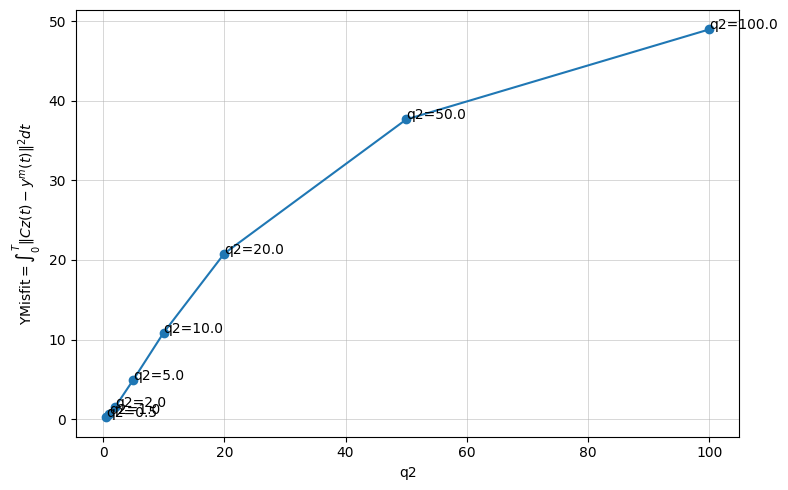

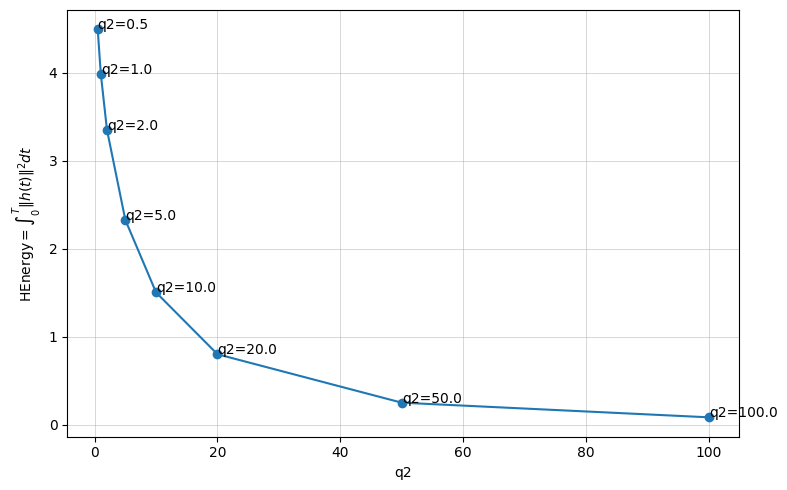

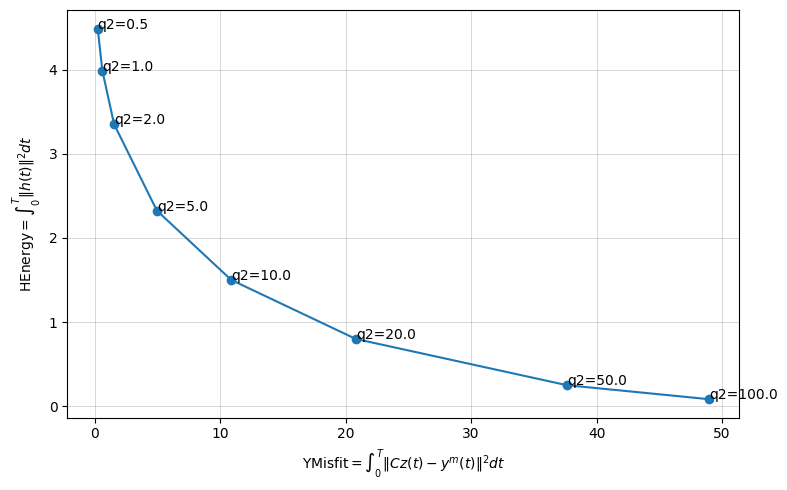

In [8]:
# Sensibility of q2: sweep q2, compute solutions & metrics
q1 = 0.01
q2_list = [0.5, 1, 2, 5, 10, 20, 50, 100]   # we start by 0.5 because q2<=0.25 flatten the h2 curves

curves_z1, curves_z2, curves_h1, curves_h2, metrics = q2_sensibility(A, G2, C, z0, h1, h2, T, N, q1, q2_list, save=False, outdir = "figs")

In [9]:
metrics

,q2,z0_error,z0_energy,z_rmse,h_rmse,misfit,energy
0,0.5,0.057443,6.427235,0.040131,0.962251,0.228257,4.490115
1,1.0,0.087399,6.463486,0.063845,0.870325,0.600633,3.987162
2,2.0,0.132806,6.508282,0.100711,0.748395,1.535505,3.352174
3,5.0,0.220346,6.589640,0.178703,0.534547,4.947347,2.325346
4,10.0,0.311235,6.672699,0.263424,0.348905,10.865558,1.501995
5,20.0,0.418470,6.769898,0.363254,0.229393,20.801106,0.799946
6,50.0,0.554503,6.892276,0.487430,0.343581,37.640574,0.249766
7,100.0,0.630221,6.960056,0.555335,0.466504,48.953895,0.083440


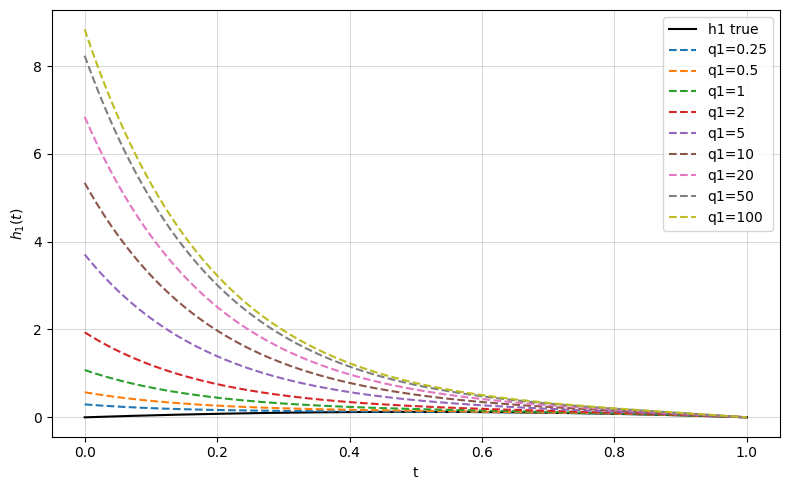

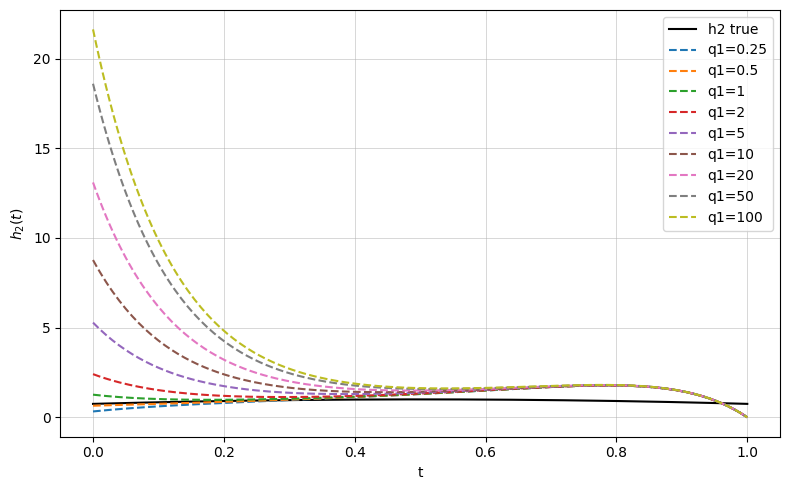

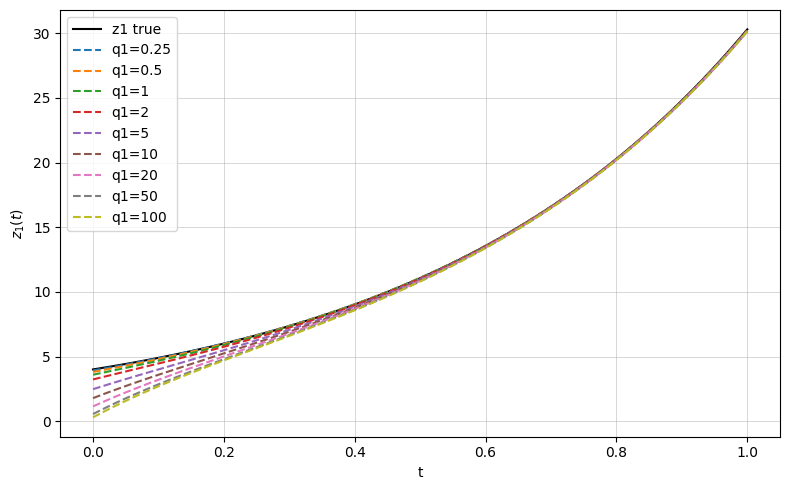

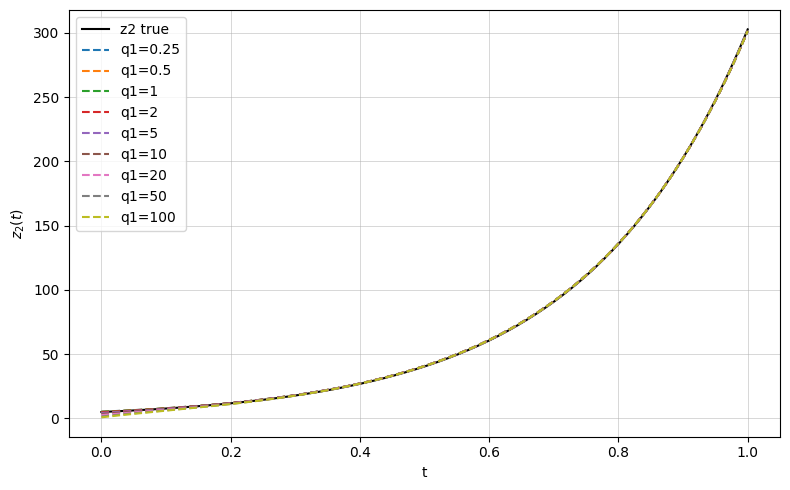

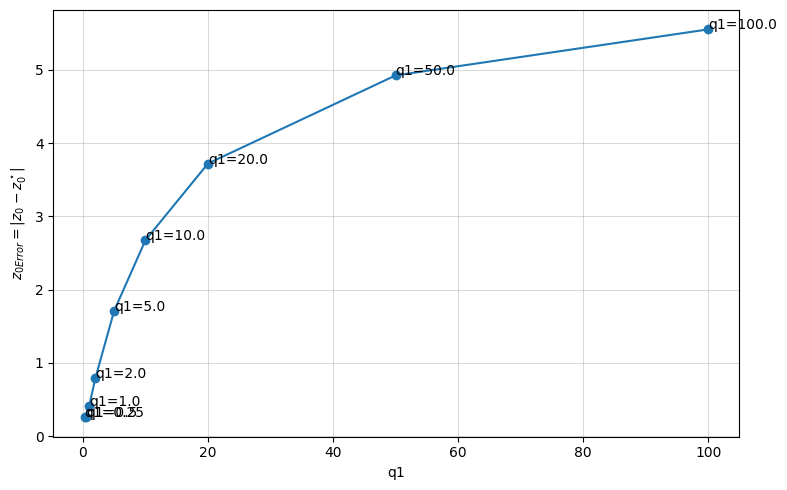

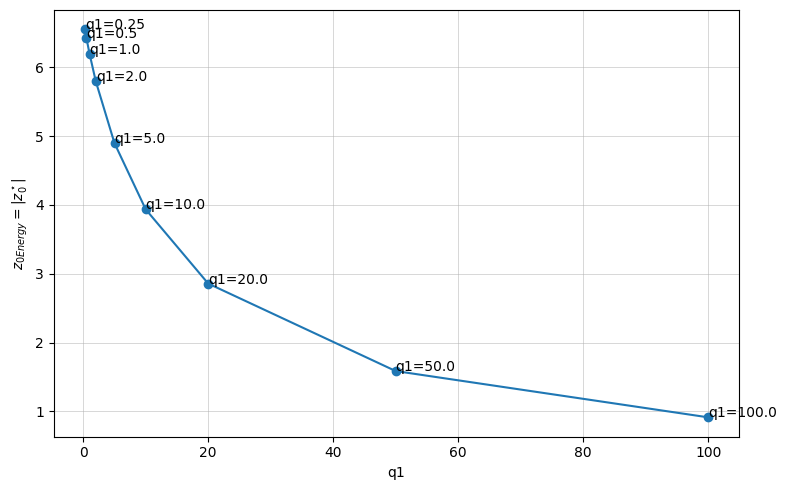

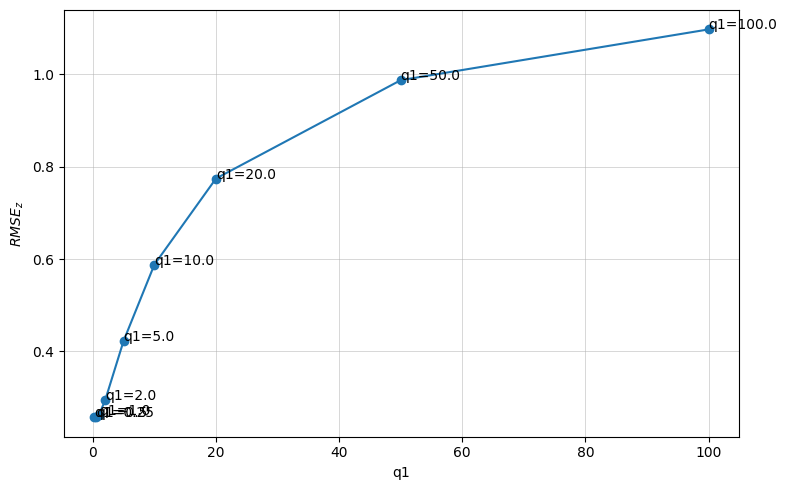

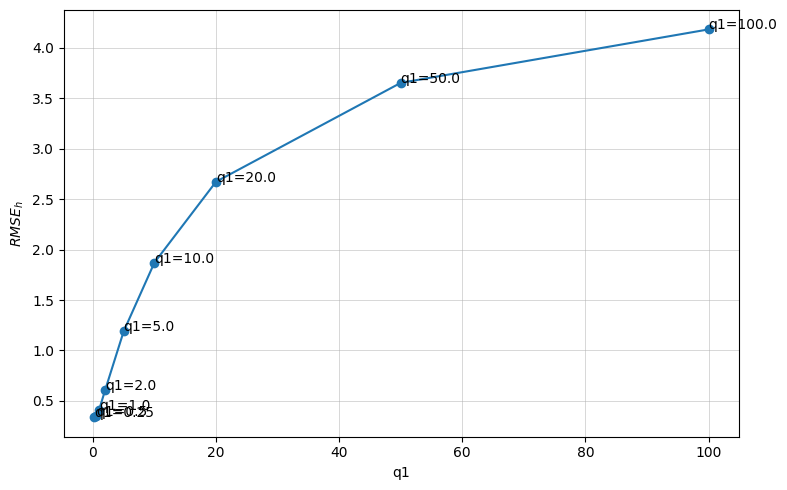

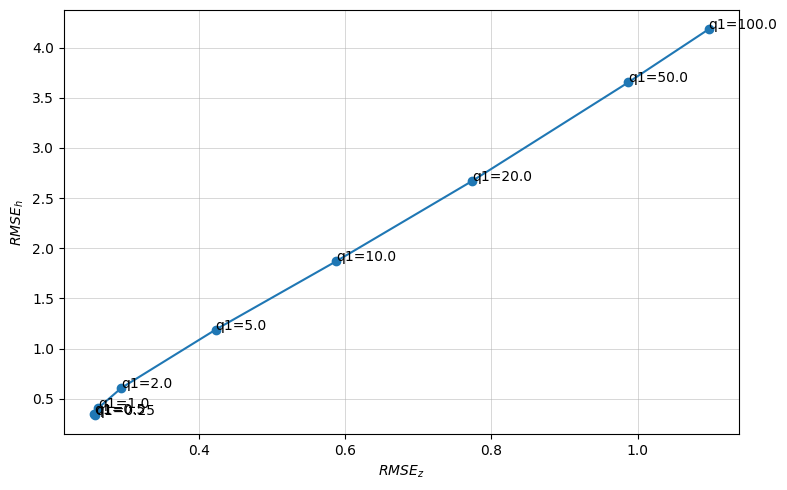

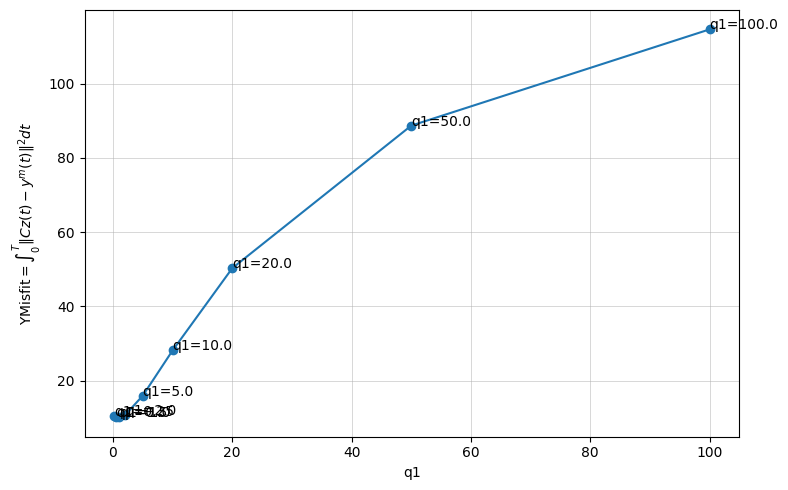

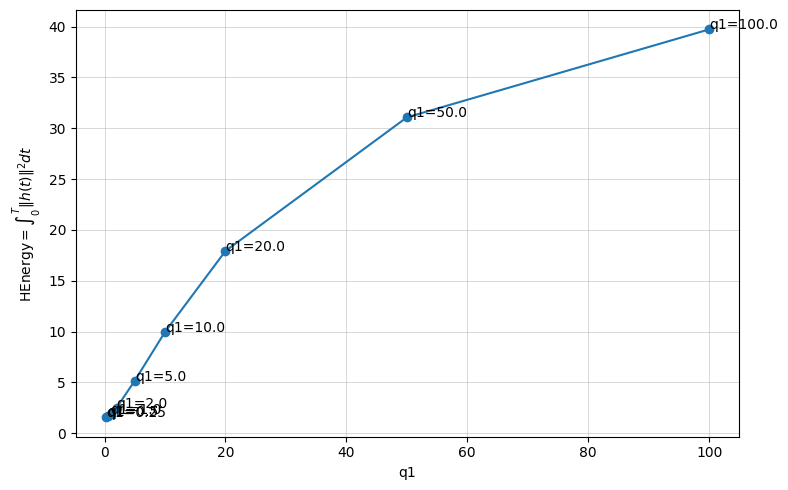

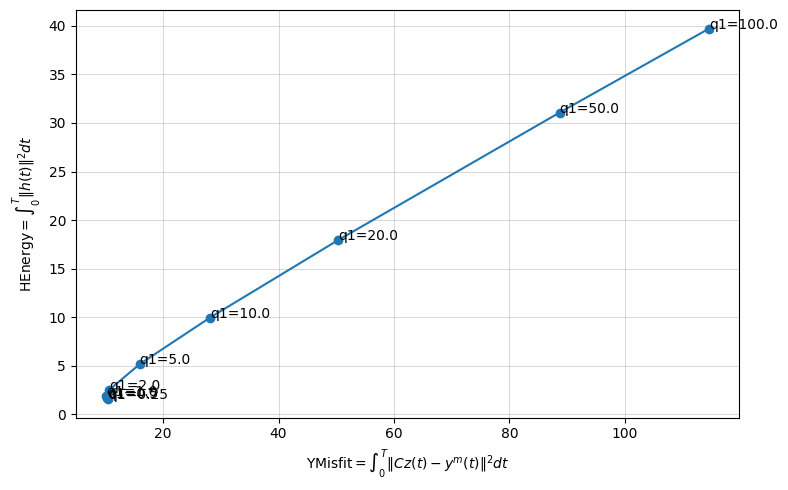

In [10]:
# Sensibility of q1: sweep q1, compute solutions & metrics
q1_list = [0.25, 0.5, 1, 2, 5, 10, 20, 50, 100]
q2 = 10

curves_z1, curves_z2, curves_h1, curves_h2, metrics = q1_sensibility(A, G2, C, z0, h1, h2, T, N, q1_list, q2, save=False, outdir = "figs")

In [11]:
metrics

,q1,z0_error,z0_energy,z_rmse,h_rmse,misfit,energy
0,0.25,0.255357,6.548877,0.258923,0.337116,10.525941,1.556492
1,0.50,0.263372,6.426101,0.257531,0.345388,10.288528,1.638611
2,1.00,0.412576,6.197495,0.262982,0.408316,10.112533,1.867303
3,2.00,0.795692,5.796547,0.294484,0.607713,10.652912,2.513012
4,5.00,1.712808,4.895502,0.423242,1.188687,15.943055,5.162685
5,10.00,2.675002,3.933741,0.588174,1.871170,28.124540,9.956027
6,20.00,3.720944,2.856659,0.774280,2.672963,50.280847,17.921403
7,50.00,4.923845,1.585961,0.987074,3.653620,88.695904,31.067175
8,100.00,5.552302,0.913884,1.096953,4.183667,114.623228,39.723537


Optimal compromise :
  q1* = 0.001, q2* = 0.5
  z0 error = 0.067
  RMSE(z) = 0.041
  RMSE(h) = 0.962
  Misfit*   = 0.233
  Energy*   = 4.477
  Objective = 2.478
---------------------------------------------------------------------- 
Plot process: ...


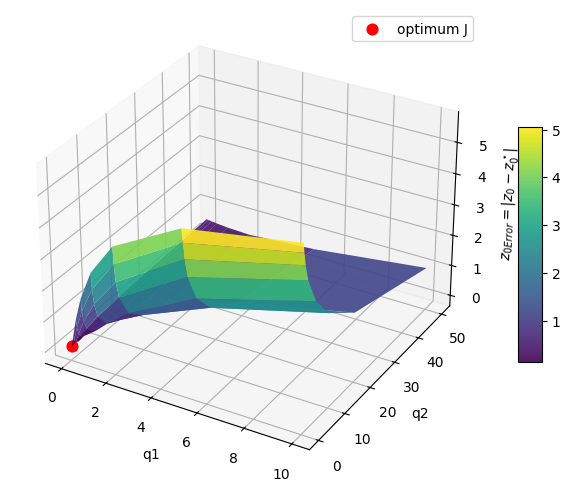

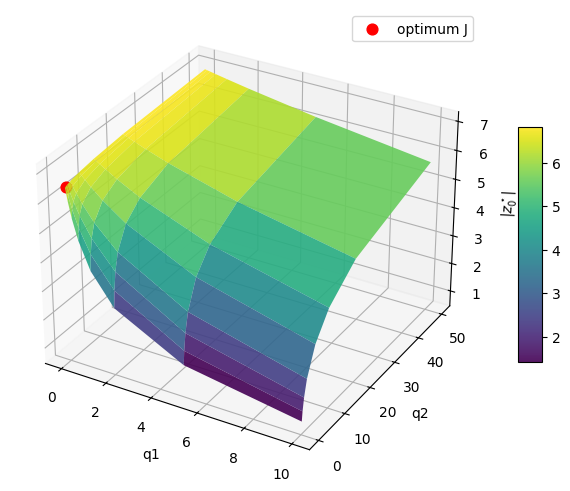

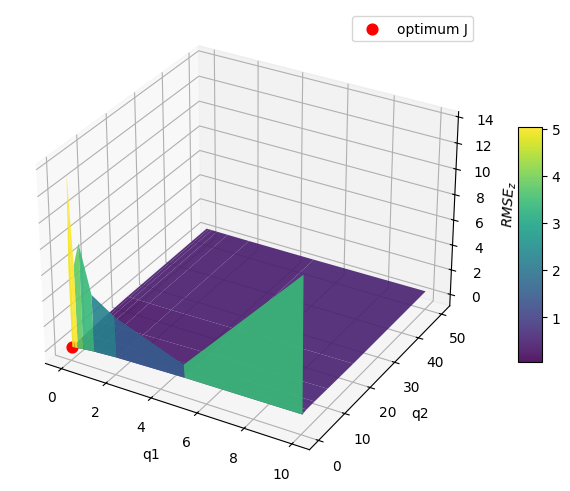

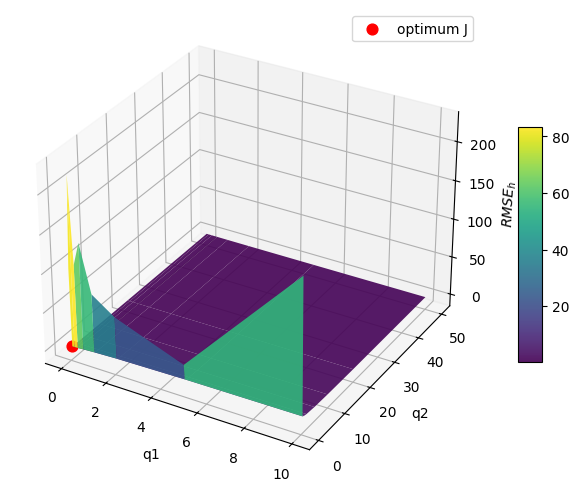

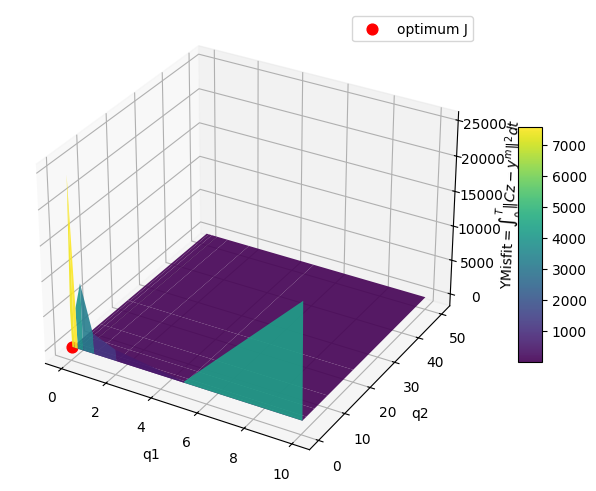

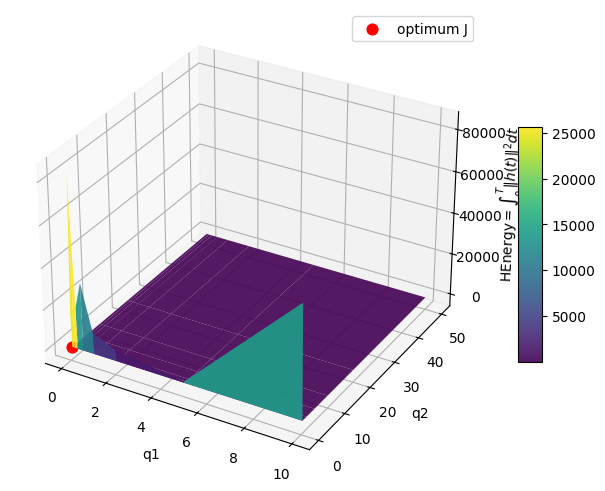

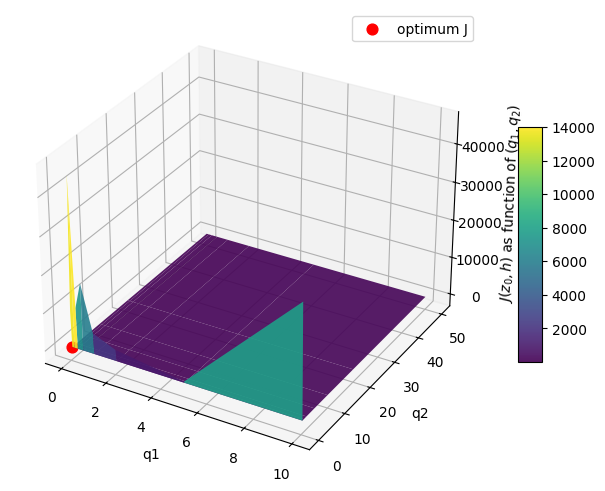

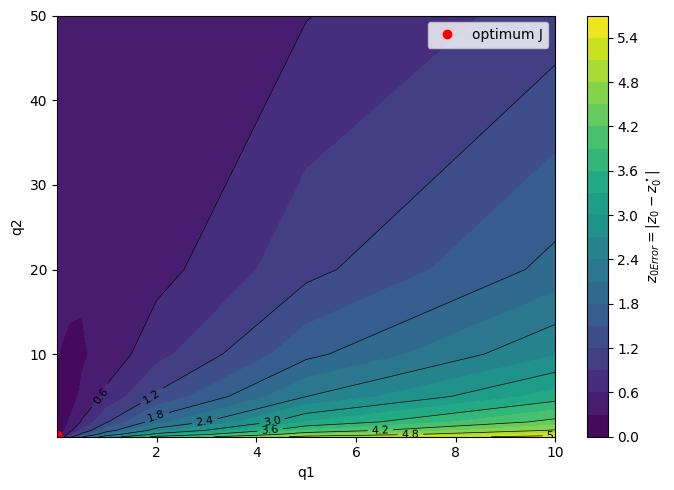

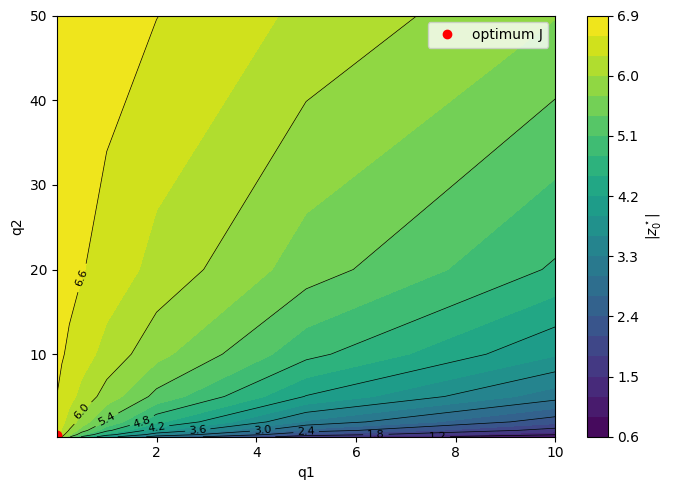

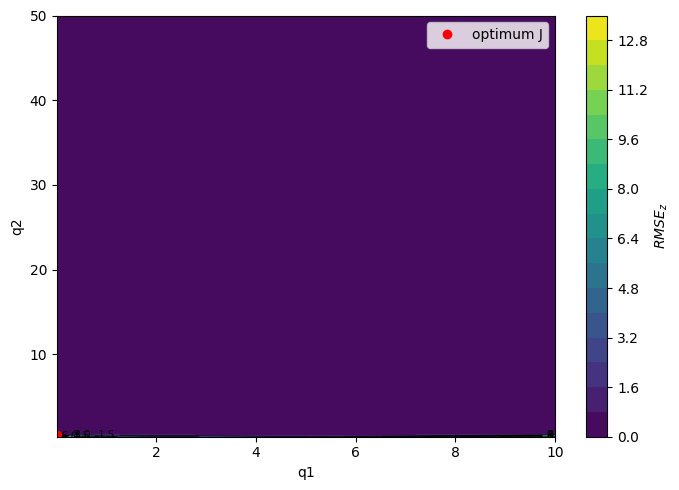

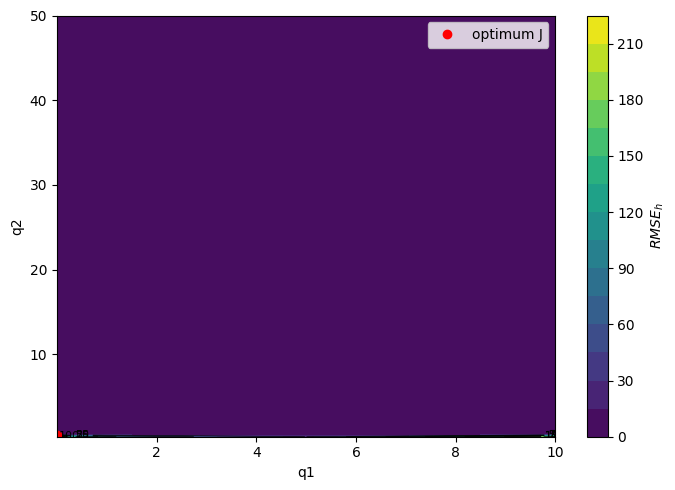

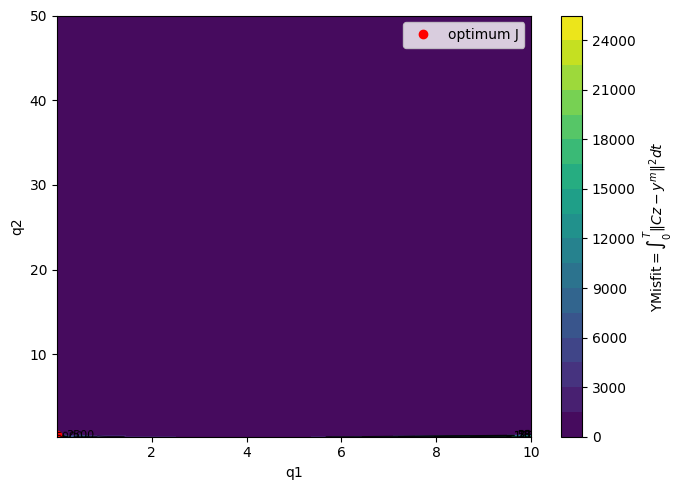

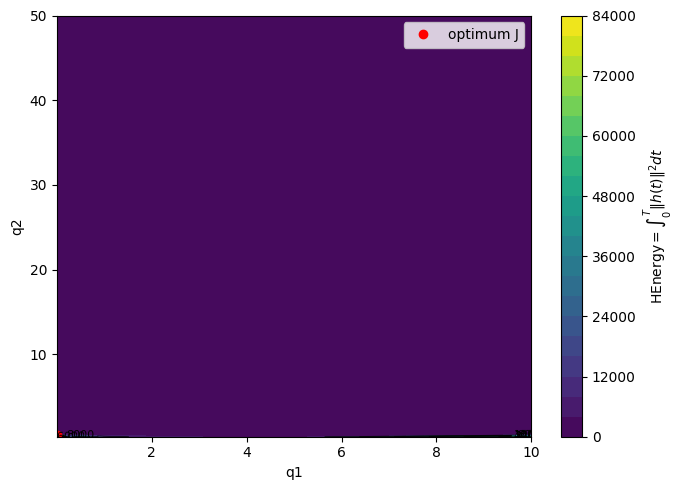

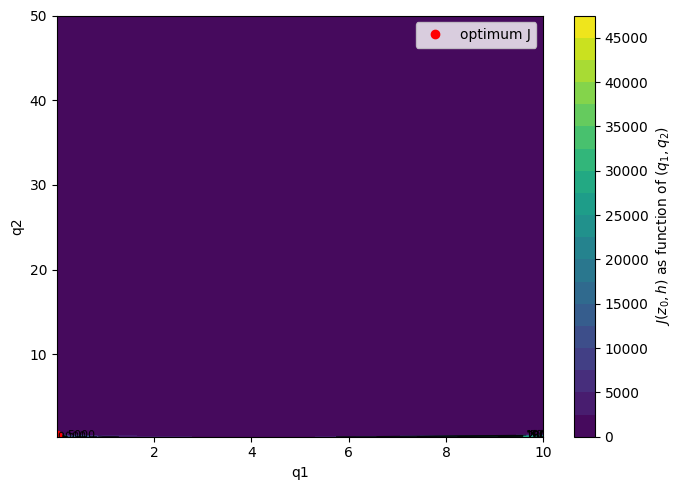

In [12]:
# Sensibility of q1 and q2: sweep q1 and q2, compute solutions & metrics, and search optimum q1 and q2
q1_vals = [0.001, 0.1, 0.25, 0.5, 1, 2, 5, 10]
q2_vals = [0.25, 0.5, 1, 2, 5, 10, 20, 50]

# q1_vals = np.linspace(0.001, 1, 10)
# q2_vals = np.linspace(0.001, 1, 10)

curves_z, curves_h, metrics, q1_opt, q2_opt = q12_sensibility_with_optimum(A, G2, C, z0, h1, h2, T=1, N=200, 
                                                                           q1_list=q1_vals, q2_list=q2_vals, save=False, outdir="figs_3D")

In [13]:
metrics

,q1,q2,z0_error,z0_energy,z_rmse,h_rmse,misfit,energy,objective
0,0.001,0.25,0.045622,6.437936,6.263002,103.742240,5318.937150,18082.068032,9839.460596
1,0.001,0.50,0.067080,6.457006,0.040500,0.962148,0.233010,4.476921,2.477927
2,0.001,1.00,0.097473,6.483707,0.064086,0.871059,0.604940,3.981544,4.592968
3,0.001,2.00,0.140609,6.521778,0.100979,0.749096,1.542379,3.348303,8.245506
4,0.001,5.00,0.225153,6.597261,0.178964,0.535245,4.958765,2.322969,16.580206
...,...,...,...,...,...,...,...,...,...
59,10.000,2.00,4.308813,2.212232,0.614889,3.794859,32.347486,31.686243,117.842287
60,10.000,5.00,3.437257,3.131182,0.620371,2.627822,31.635621,17.232467,149.109777
61,10.000,10.00,2.675002,3.933741,0.588174,1.871170,28.124540,9.956027,167.022218
62,10.000,20.00,1.895828,4.757724,0.543845,1.222036,26.386994,5.093179,175.827816


===== Results =====
z0 true = [4. 5.], z0 estimated = [4.00225004 5.06704223], error = 0.067
RMSE(z) = 0.041
RMSE(h) = 0.962
Misfit = 0.233
Energy = 4.477


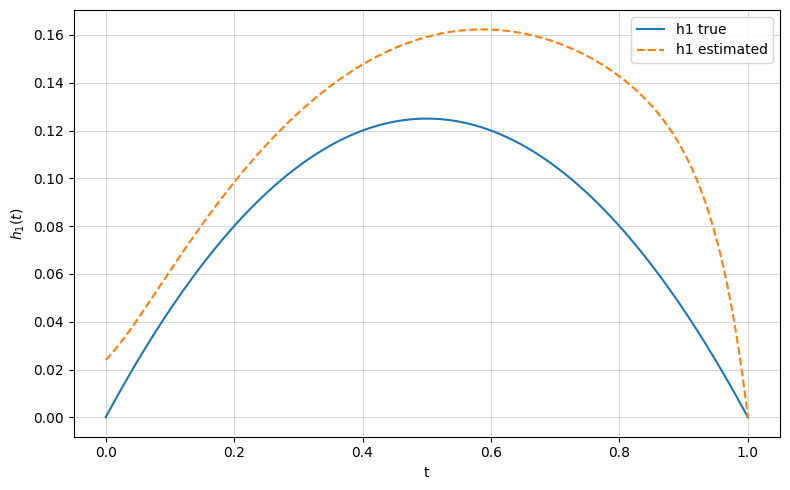

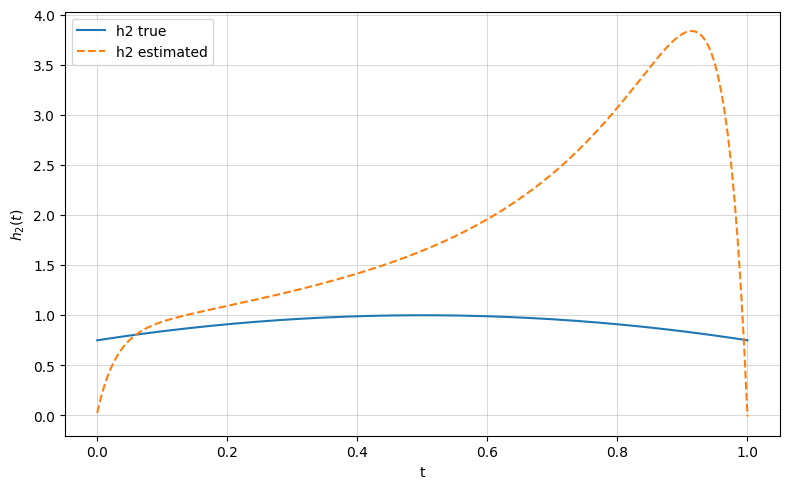

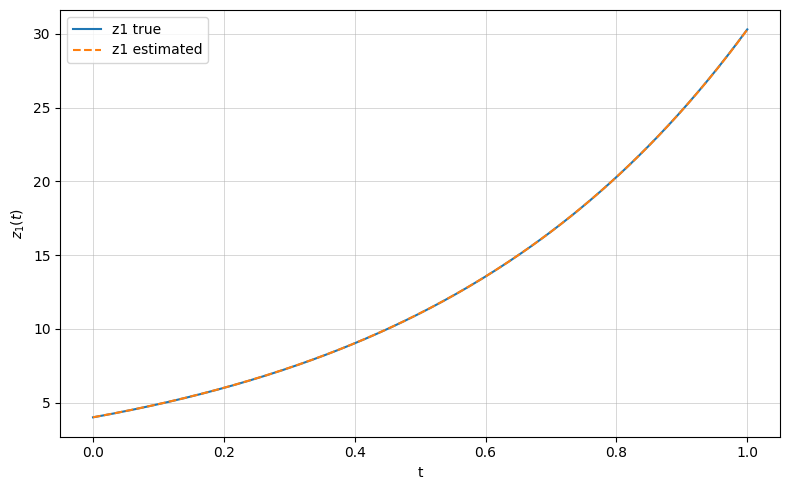

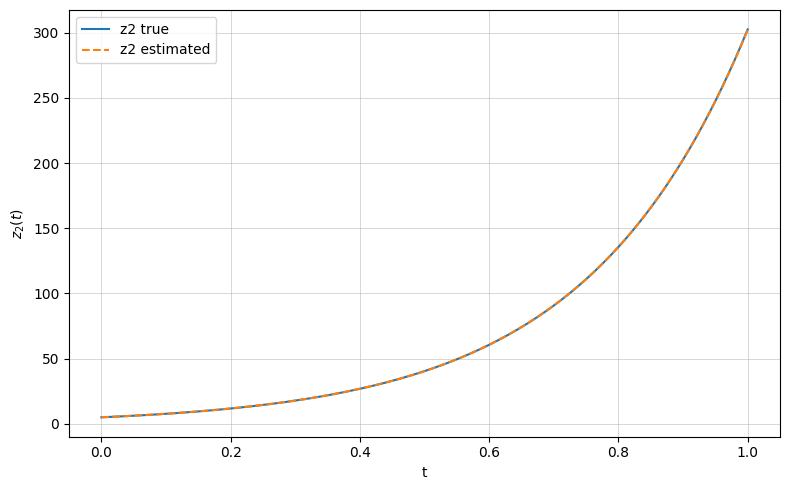

In [14]:
# Simulation for q1_opt and q2_opt (step 1 to 4)
h_true, z_true, y_m, z0_est, z_est, h_est = simulate_n2(A, G2, C, z0, h1, h2, T, N, q1_opt, q2_opt)

# Step 5: metrics
z0_error, z0_energy, z_rmse, h_rmse, misfit, energy = compute_metrics(C, z0, h_true, z_true, y_m, z0_est, z_est, h_est, t)
print("===== Results =====")
print(f"z0 true = {z0}, z0 estimated = {z0_est}, error = {z0_error:.3f}")
print(f"RMSE(z) = {z_rmse:.3f}")
print(f"RMSE(h) = {h_rmse:.3f}")
print(f"Misfit = {misfit:.3f}")
print(f"Energy = {energy:.3f}")

# Step 5: quick plots
make_plots(h_true, z_true, z_est, h_est, t, save=False, outdir = "figs")